In [26]:
import pandas as pd
import numpy as np
import pyreadstat as py

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [ ]:
!pip install pyreadstat

     |████████████████████████████████| 2.0MB 2.6MB/s 


In [ ]:
import pyreadstat as py

In [8]:
data = pd.read_csv('/content/data.csv')

In [9]:
data.head()

,sentiment,text,user
0,negative,RT @nramind: Something’s gone seriously wrong ...,bnmallick
1,positive,Exploring the Real World of #DataScience - KDn...,travissari
2,positive,@boltsandbombers The data of animal agricultur...,tommy3141watson
3,positive,We are excited that #NYULibraries is now part ...,nyudataservices
4,positive,"RT @IreneSuaMar: My latest \science garment\"":...",Dybel


In [10]:
tweets = data[['user','text']]
tweets.head()

,user,text
0,bnmallick,RT @nramind: Something’s gone seriously wrong ...
1,travissari,Exploring the Real World of #DataScience - KDn...
2,tommy3141watson,@boltsandbombers The data of animal agricultur...
3,nyudataservices,We are excited that #NYULibraries is now part ...
4,Dybel,"RT @IreneSuaMar: My latest \science garment\"":..."


In [13]:
tweets.tail(20)

,user,text
58,cache4it,Are you a Sky Mobile user? If you PiggyBank yo...
59,pureit,Are you a Sky Mobile user? If you PiggyBank yo...
60,PatriciaSarge18,RT @drdavidsamadi: Fear does not help us comba...
61,ToShawnAnderson,RT @bunsenbernerbmd: Momentum: quality of moti...
62,MikeBrooksOATF,RT @drdavidsamadi: Fear does not help us comba...
63,CoffeTechnology,"RT @antgrasso: Oracle Data Science Overview, a..."
64,CMOandCompany,Creating a Visual Narrative in Data Science ht...
65,DeathReveals,"RT @IreneSuaMar: My latest \science garment\"":..."
66,Thymbraeus,"RT @IreneSuaMar: My latest \science garment\"":..."
67,gentackle,Besides issues of extracting value from large ...


In [14]:
tweets.text.unique().shape

(65,)

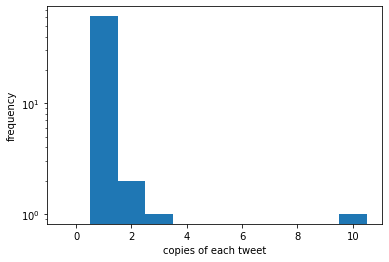

In [16]:
import matplotlib.pyplot as plt
# number of times each tweet appears
counts = tweets.groupby(['text']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [18]:
import seaborn as sns
sns.set(color_codes = True)

#sns.stripplot(tweets['text'], tweets['user'], jitter= True)

In [19]:
tweets.shape

(78, 2)

In [20]:
#new column for retweets
tweets['is_retweet'] = tweets['text'].apply(lambda x: x[:2]=='RT')
tweets['is_retweet'].sum()  # number of retweets

40

In [22]:
##most repeated tweets
tweets.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(5)

,text,counts
36,"RT @IreneSuaMar: My latest \science garment\"":...",10
50,RT @drdavidsamadi: Fear does not help us comba...,3
32,"RT @CVASPS: The Manual, Vol. 1, Ch. 2: Sport S...",2
57,RT @webofscience: Web of Science Journal Citat...,2
37,RT @ManashiGanguly: If you ever wanted to unde...,1


In [23]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [27]:
#new column for retweets,mentioned
tweets['retweeted'] = tweets.text.apply(find_retweeted)
tweets['mentioned'] = tweets.text.apply(find_mentioned)
tweets['hashtags'] = tweets.text.apply(find_hashtags)

In [28]:
tweets.head()

,user,text,is_retweet,retweeted,mentioned,hashtags
0,bnmallick,RT @nramind: Something’s gone seriously wrong ...,True,[@nramind],[],[]
1,travissari,Exploring the Real World of #DataScience - KDn...,False,[],[],[#DataScience]
2,tommy3141watson,@boltsandbombers The data of animal agricultur...,False,[],[@boltsandbombers],[]
3,nyudataservices,We are excited that #NYULibraries is now part ...,False,[],[@open_textbooks],[#NYULibraries]
4,Dybel,"RT @IreneSuaMar: My latest \science garment\"":...",True,[@IreneSuaMar],[],[#geoscience]


In [29]:
tweets.is_retweet.value_counts()

True     40
False    38
Name: is_retweet, dtype: int64

In [30]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets.loc[
                       tweets.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [31]:
hashtags_list_df.head()

,hashtags
1,[#DataScience]
3,[#NYULibraries]
4,[#geoscience]
6,[#geoscience]
8,[#geoscience]


In [37]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets.loc[
                       tweets.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]


In [38]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [39]:
flattened_hashtags_df.head()

,hashtag
0,#DataScience
1,#NYULibraries
2,#geoscience
3,#geoscience
4,#geoscience


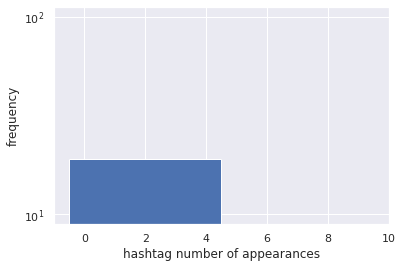

In [40]:
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()                                        

In [42]:
# take the rows from the hashtag columns where there are actually hashtags
mentioned_list_df = tweets.loc[
                       tweets.mentioned.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['mentioned']]

# create dataframe where each use of hashtag gets its own row
flattened_mentioned_df = pd.DataFrame(
    [mentioned for mentioned_list in mentioned_list_df.mentioned
    for mentioned in mentioned_list],
    columns=['mentioned'])

# number of times each hashtag appears
counts = flattened_mentioned_df.groupby(['mentioned']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5
                     

In [43]:
# take hashtags which appear at least this amount of times
min_appearance = 1000
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])


# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [44]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


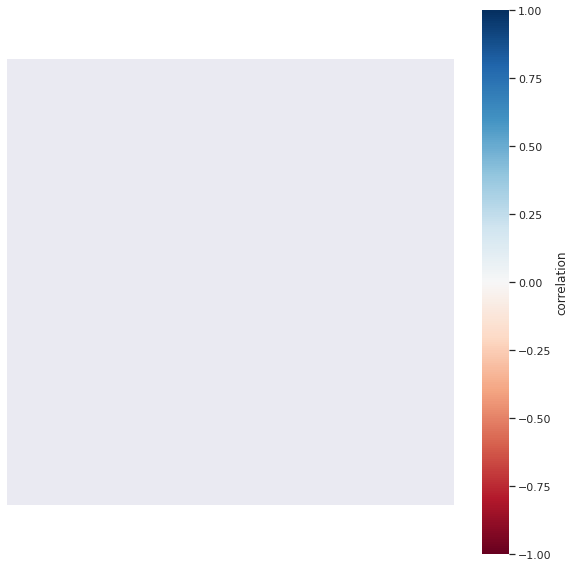

In [45]:
# Drop popular_hashtags columns
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)


# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()